In [6]:
%run world_happiness_data.py

C:\Users\sabri\OneDrive\Documents\Desktop\Formation-data\project\world_happiness_report\world_happiness_data.py:156: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)


# **4. EDA**

# 4.1.Which countries are Happier over time?

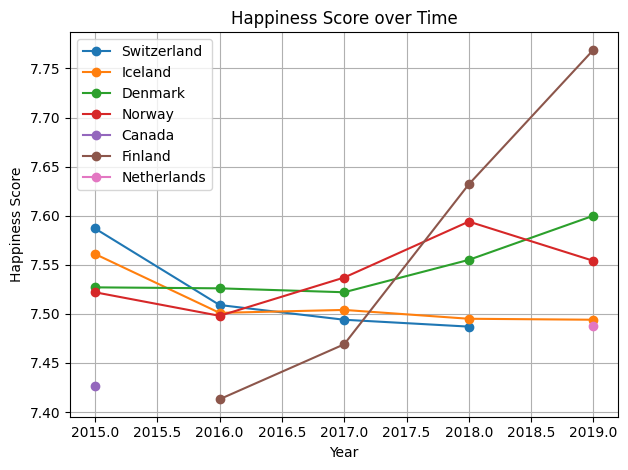

In [7]:
top_5_df = pd.read_csv("Queries/top_5_happy_countries_year.csv")
for country in top_5_df['country_name'].unique():
    country_data = top_5_df[top_5_df['country_name'] == country]
    plt.plot(country_data['year'], country_data['happiness_score'], marker='o', label=country)

plt.title("Happiness Score over Time")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4.2.What are the factors most strongly correlated with happiness in a country?

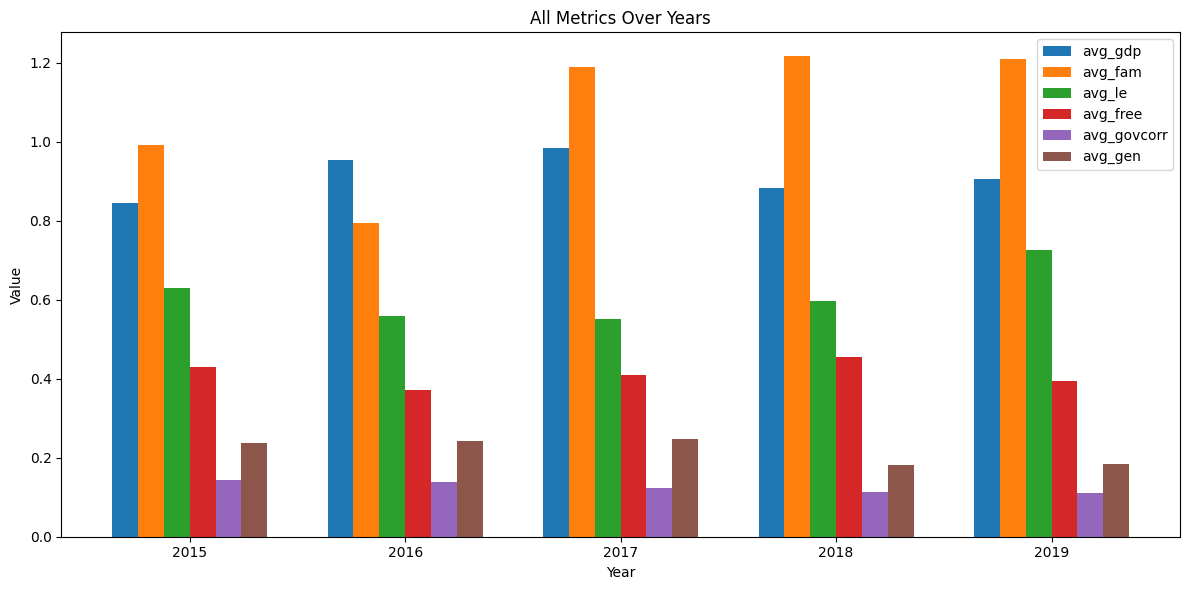

In [8]:
year_factor = pd.read_csv("Queries/average_factors_by_year.csv")
bar_width = 0.12
years = year_factor["year"]
x = range(len(years))
plt.figure(figsize=(12, 6))

for i, column in enumerate(year_factor.columns[1:]):
    plt.bar(
        [pos + bar_width * i for pos in x],
        year_factor[column],
        width=bar_width,
        label=column
    )

plt.xticks([pos + bar_width * 2.5 for pos in x], years)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("All Metrics Over Years")
plt.legend()
plt.tight_layout()

plt.show()

# 4.3. Hypothesis 1: Countries with higher life expectancy (proxy for healthcare quality) tend to have higher happiness score

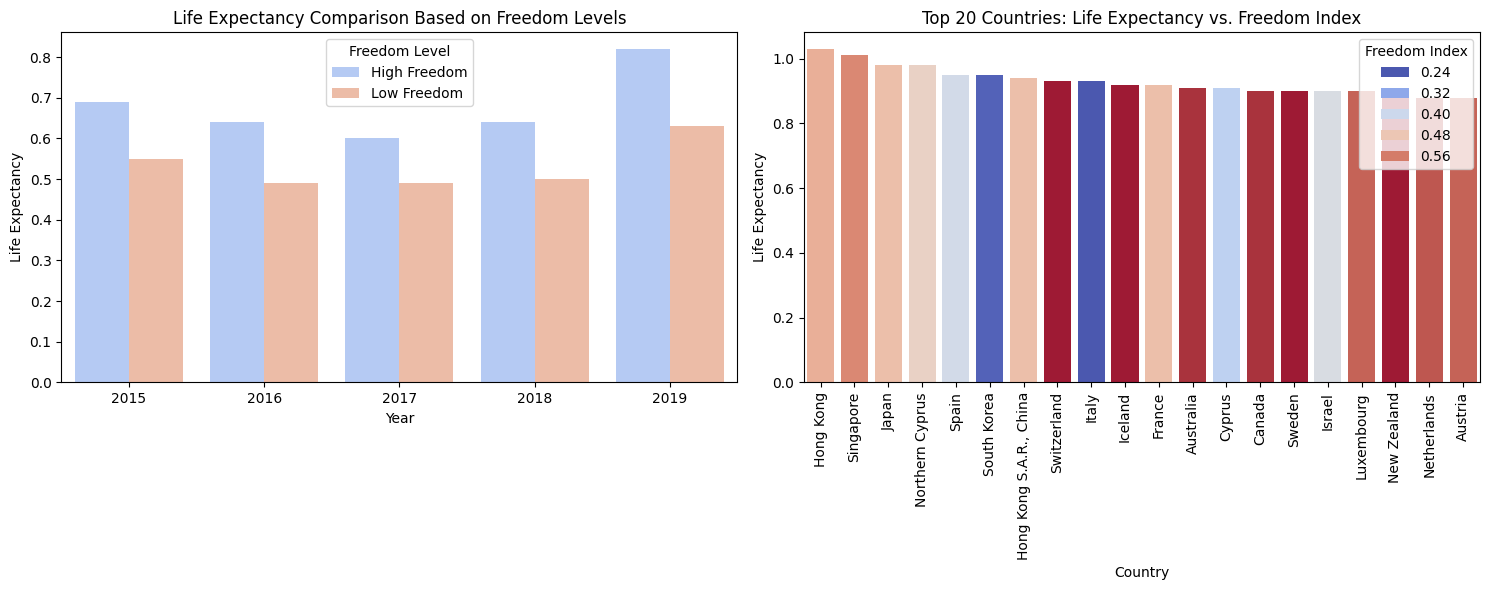

In [9]:

# Load dataset
df_1 = pd.read_csv('Queries/H1_5years.csv')
df = pd.read_csv('Queries/H1.csv')

# Select top 20 countries based on life expectancy
df_top20 = df.sort_values(by="avg_life_expectancy", ascending=False).head(20)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# First subplot: Life expectancy comparison over time (bar chart)
sns.barplot(data=df_1, x="year", y="avg_life_expectancy", hue="freedom_group", palette="coolwarm", ax=axes[0])
axes[0].set_title("Life Expectancy Comparison Based on Freedom Levels")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Life Expectancy")
axes[0].legend(title="Freedom Level")

# Second subplot: Top 20 countries ranked by life expectancy (bar chart)
sns.barplot(x=df_top20["country"], y=df_top20["avg_life_expectancy"], hue=df_top20["avg_freedom"], palette="coolwarm", ax=axes[1])

# Fix the tick labels warning by explicitly setting the tick positions
axes[1].set_xticks(range(len(df_top20["country"])))
axes[1].set_xticklabels(df_top20["country"], rotation=90)  # Rotate labels for readability

axes[1].set_title("Top 20 Countries: Life Expectancy vs. Freedom Index")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Life Expectancy")
axes[1].legend(title="Freedom Index")

# Adjust layout for readability
plt.tight_layout()

# Show the combined figure
plt.show()

# 4.4 Hypothesis 2: more freedom in a country correlates positively with corruption perception, meaning personal and political freedoms significantly impact the transparacy of the government

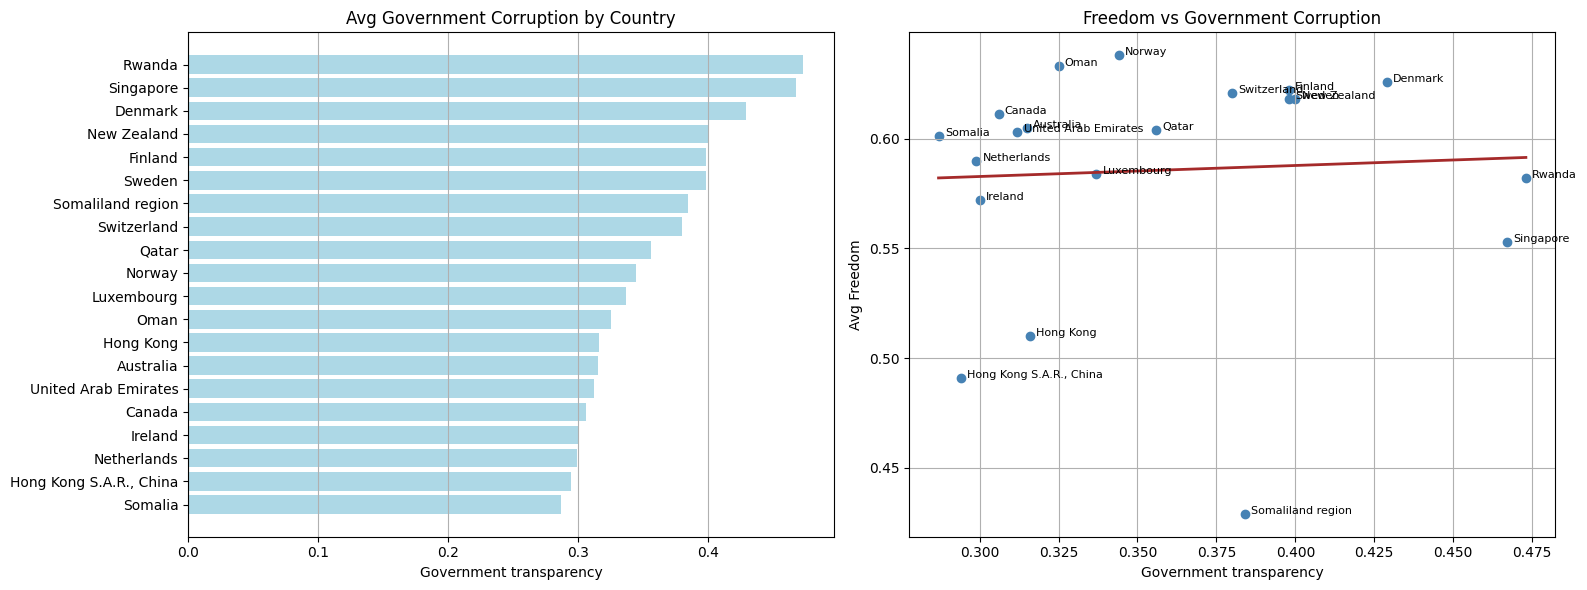

In [10]:
corrp_freedom = pd.read_csv("Queries/corrp_freedom.csv")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df_sorted = corrp_freedom.sort_values(by='avg_corruption', ascending=False)
axes[0].barh(df_sorted['country_name'], df_sorted['avg_corruption'], color='lightblue')
axes[0].set_title('Avg Government Corruption by Country')
axes[0].set_xlabel('Government transparency')
axes[0].invert_yaxis()
axes[0].grid(axis='x')


x = corrp_freedom['avg_corruption']
y = corrp_freedom['avg_freedom']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='brown', linewidth=2, label='Trend line')

axes[1].scatter(corrp_freedom['avg_corruption'], corrp_freedom['avg_freedom'], color='steelblue')
for i, row in corrp_freedom.iterrows():
    axes[1].text(row['avg_corruption'] + 0.002, row['avg_freedom'], row['country_name'], fontsize=8)
axes[1].set_title('Freedom vs Government Corruption')
axes[1].set_xlabel('Government transparency')
axes[1].set_ylabel('Avg Freedom')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# 4.5. Hypothesis 3: Lower government corruption levels are associated with higher happiness score, suggesting that transparency and good governance improve well-being

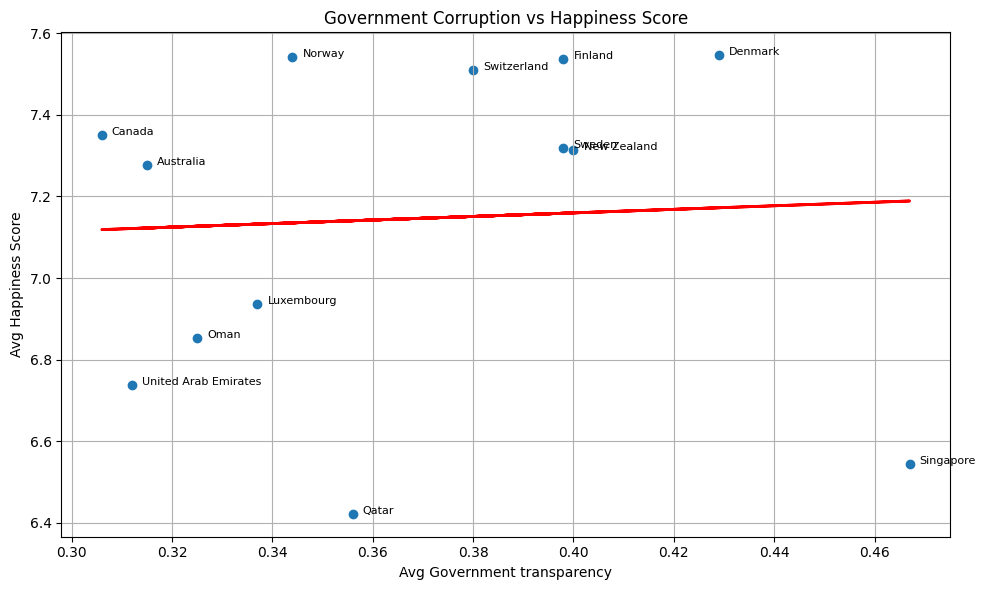

In [11]:
gov_corr = pd.read_csv("Queries/gov_corruption_vs_happiness.csv")
plt.figure(figsize=(10, 6))
plt.scatter(gov_corr['avg_government_corruption'], gov_corr['avg_happiness_score'])

# Adicionar nomes dos países como rótulos
for i, row in gov_corr.iterrows():
    plt.text(row['avg_government_corruption'] + 0.002, row['avg_happiness_score'], row['country_name'], fontsize=8)

x = gov_corr['avg_government_corruption']
y = gov_corr['avg_happiness_score']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='red', linewidth=2, label='Trend line')

plt.title("Government Corruption vs Happiness Score")
plt.xlabel("Avg Government transparency")
plt.ylabel("Avg Happiness Score")
plt.grid(True)
plt.tight_layout()
plt.show()


# 4.6. Hypothesis 4: Stronger family and community support is linked to higher GDP in low-income countries, suggesting that social cohesion can play a role in development

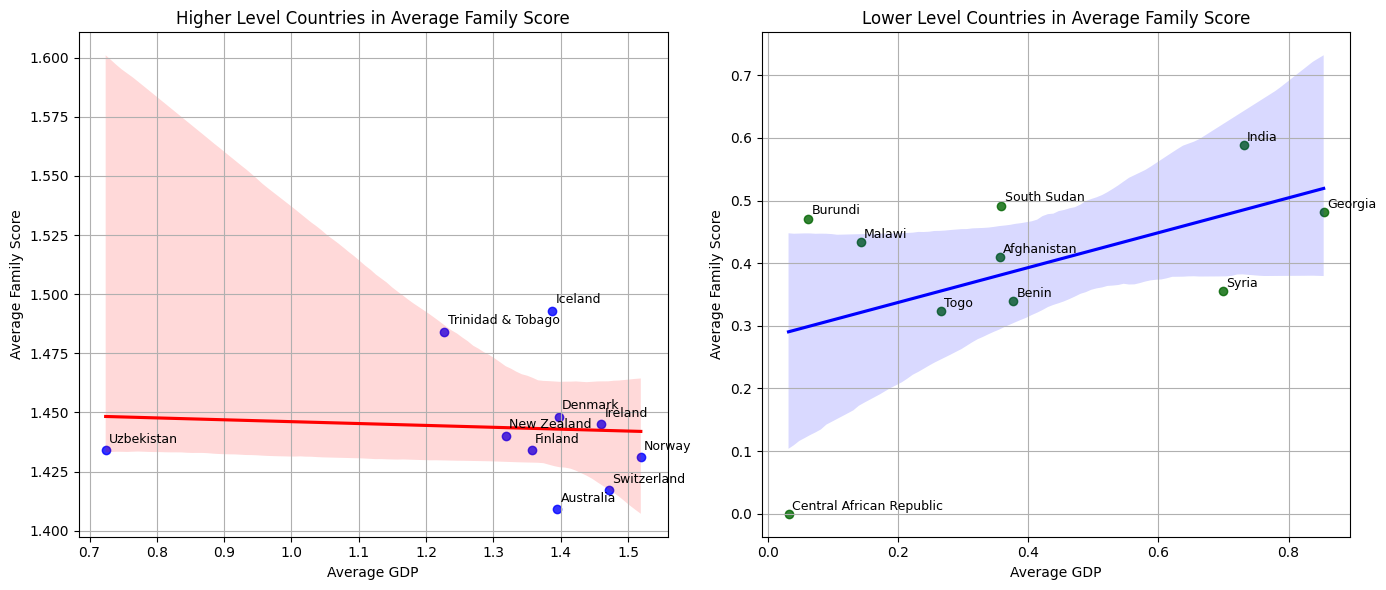

In [12]:

# Load the datasets
gdp_family = pd.read_csv("Queries/GDP_FAMILY_by_country.csv")
fam = pd.read_csv("Queries/GDP_FAMILY_ASC_by_country.csv")

# Create a single figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# First plot - Higher level countries
sns.regplot(data=gdp_family, x='avg_gdp', y='avg_fam', scatter=True, color='blue', line_kws={"color": "red"}, ax=axes[0])
axes[0].set_xlabel('Average GDP')
axes[0].set_ylabel('Average Family Score')
axes[0].set_title('Higher Level Countries in Average Family Score')
axes[0].grid(True)

# Add country labels at each point
for i in range(len(gdp_family)):
    axes[0].text(gdp_family['avg_gdp'][i] + 0.005, gdp_family['avg_fam'][i] + 0.002, gdp_family['country'][i],
                 fontsize=9, ha='left', va='bottom')

# Second plot - Lower level countries
sns.regplot(data=fam, x='avg_gdp', y='avg_fam', scatter=True, color='darkgreen', line_kws={"color": "blue"}, ax=axes[1])
axes[1].set_xlabel('Average GDP')
axes[1].set_ylabel('Average Family Score')
axes[1].set_title('Lower Level Countries in Average Family Score')
axes[1].grid(True)

# Add country labels at each point
for i in range(len(fam)):
    axes[1].text(fam['avg_gdp'][i] + 0.005, fam['avg_fam'][i] + 0.002, fam['country'][i],
                 fontsize=9, ha='left', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

# 4.7. Hypothesis 5: A high GDP does not necessarily guarantee a high happiness score

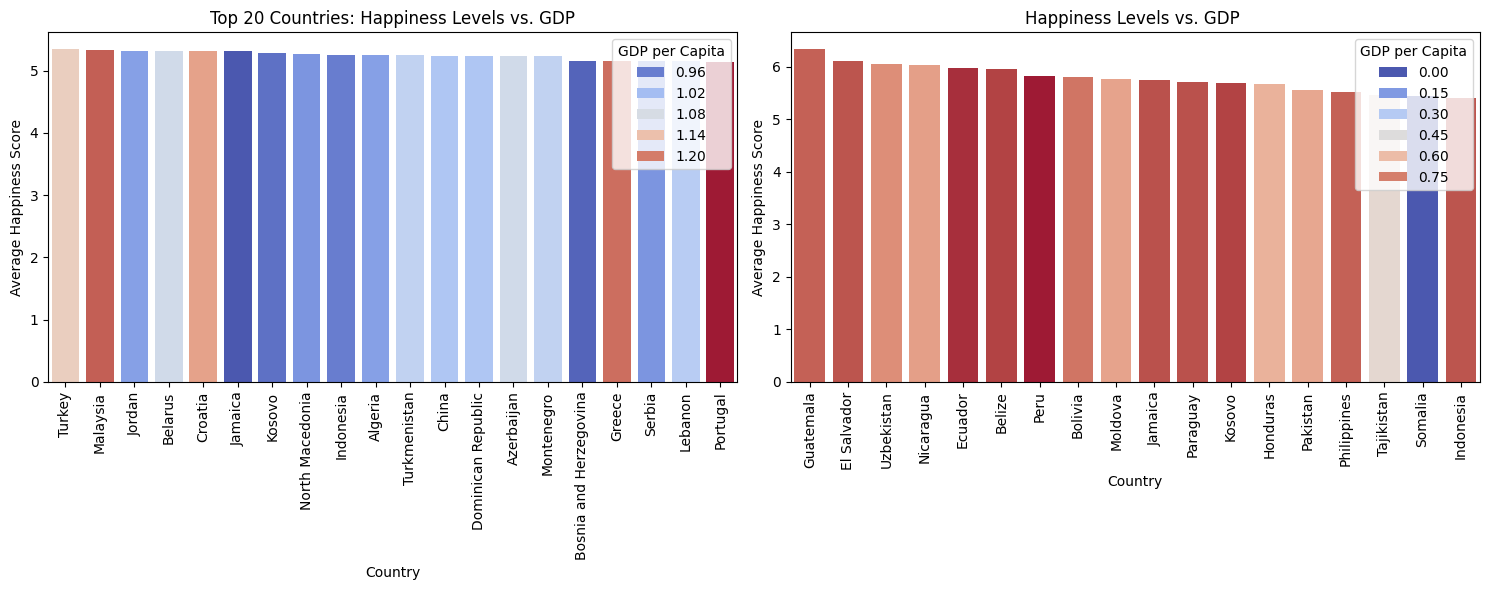

In [13]:
# Load datasets
df_H5 = pd.read_csv('Queries/H5.csv')
df_H5_sorted = df_H5.sort_values(by="avg_happiness", ascending=False).head(20)
df_H5_1 = pd.read_csv('Queries/happinessVSGDP.csv')

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns

# Define a consistent color palette
palette = "coolwarm"

# First subplot: Top 20 Countries Happiness vs. GDP
sns.barplot(x=df_H5_sorted["country"], y=df_H5_sorted["avg_happiness"], hue=df_H5_sorted["avg_gdp"], palette=palette, ax=axes[0])
axes[0].set_xticks(range(len(df_H5_sorted["country"])))  # Fix for tick labels warning
axes[0].set_xticklabels(df_H5_sorted["country"], rotation=90)  # Rotate labels for readability
axes[0].set_title("Top 20 Countries: Happiness Levels vs. GDP")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Average Happiness Score")
axes[0].legend(title="GDP per Capita")

# Second subplot: Happiness Levels vs. GDP Across Different Countries
sns.barplot(x=df_H5_1["country"], y=df_H5_1["avg_happiness"], hue=df_H5_1["avg_gdp"], palette=palette, ax=axes[1])
axes[1].set_xticks(range(len(df_H5_1["country"])))  # Fix for tick labels warning
axes[1].set_xticklabels(df_H5_1["country"], rotation=90)  # Rotate labels for readability
axes[1].set_title("Happiness Levels vs. GDP ")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Average Happiness Score")
axes[1].legend(title="GDP per Capita")

# Adjust layout for readability
plt.tight_layout()

# Show the combined figure
plt.show()